ValueError: not enough values to unpack (expected 3, got 2)

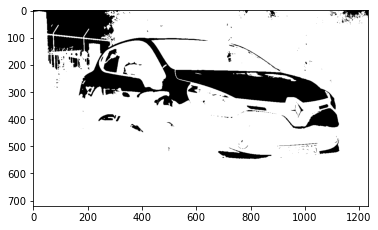

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#Load the image
img = cv2.imread('data/Image/test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Blurring for removing the noise 
img_blur = cv2.bilateralFilter(img, d = 7,sigmaSpace = 75, sigmaColor =75)
# Convert to grayscale 
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
# Apply the thresholding
a = img_gray.max()  
_, thresh = cv2.threshold(img_gray, a/2+60, a,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

# Find the contour of the figure 
image, contours, hierarchy = cv2.findContours(
                                   image = thresh, 
                                   mode = cv2.RETR_TREE, 
                                   method = cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours 
contours = sorted(contours, key = cv2.contourArea, reverse = True)
# Draw the contour 
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
plt.imshow(img_copy)